In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Import data into pandas from CSV
file1='AvgHomePriceAndStationCount.csv'
df1 = pd.read_csv(file1)
file2='zillow_neighborhood_ZHVI.csv'
df2 = pd.read_csv(file2)
merged_df = pd.merge(df1, df2, how='left', on=['RegionName'])
merged_df

,RegionName,Average Price 1 Year Before,Average Price 1 Yr After,NumberOfStation,RegionID,City,State,Metro,CountyName,SizeRank,...,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10
0,Adams Morgan,4.473333e+05,4.736333e+05,6,121668,Washington,DC,Washington,District of Columbia,606,...,562900,568800,570100,568000,566700,566000,565500,564700,562800,561400
1,Anacostia,1.925000e+05,1.895000e+05,2,121670,Washington,DC,Washington,District of Columbia,2648,...,301600,303600,305500,305000,303500,303600,305200,308300,310900,312200
2,Barney Circle,4.483000e+05,4.794000e+05,1,403486,Washington,DC,Washington,District of Columbia,2519,...,685000,693300,696200,689600,682400,678500,678800,680700,680400,678000
3,Benning,1.853000e+05,1.735000e+05,1,121675,Washington,DC,Washington,District of Columbia,4477,...,261700,267800,270300,272300,275300,278300,280800,281800,280700,279600
4,Berkley,1.501600e+06,1.644900e+06,1,268801,Washington,DC,Washington,District of Columbia,4427,...,1834900,1850900,1855600,1841100,1820900,1817300,1832100,1853100,1866800,1873800
5,Bloomingdale,4.338000e+05,4.958000e+05,1,121677,Washington,DC,Washington,District of Columbia,2315,...,744300,755400,764500,766500,763400,764400,772000,779900,778600,772800
6,Brightwood Park,3.281333e+05,3.883667e+05,3,121680,Washington,DC,Washington,District of Columbia,3644,...,489700,495000,497400,495000,490700,488300,489200,492500,495000,496600
7,Brookland,3.764667e+05,4.439750e+05,4,121681,Washington,DC,Washington,District of Columbia,1617,...,590200,596700,598400,597100,595500,594400,595400,599900,604500,607200
8,Buena Vista,1.738000e+05,2.010000e+05,1,121682,Washington,DC,Washington,District of Columbia,1634,...,258000,259700,261600,263100,264500,265200,265600,267500,269900,270900
9,Burleith,7.836000e+05,7.776000e+05,1,121683,Washington,DC,Washington,District of Columbia,3928,...,1017900,1039400,1050600,1053200,1057200,1057200,1052800,1047800,1042900,1040500


In [4]:
merged_df.to_csv("ZillowNeighborhoodMerge.csv")
new_df=pd.DataFrame({'Region': merged_df['RegionName'],
                     'NumberOfStation':merged_df['NumberOfStation'],
                     'Oct2017':merged_df['2017-10']})
#new_df.set_index('Region', inplace=True)
sorted_df=new_df.sort_values('NumberOfStation', ascending=False).reset_index(drop=True)
sorted_df.head()


,NumberOfStation,Oct2017,Region
0,19,602800,Takoma
1,17,741400,Capitol Hill
2,14,399200,Dupont Circle
3,13,327500,Foggy Bottom
4,9,967900,Colonial Village


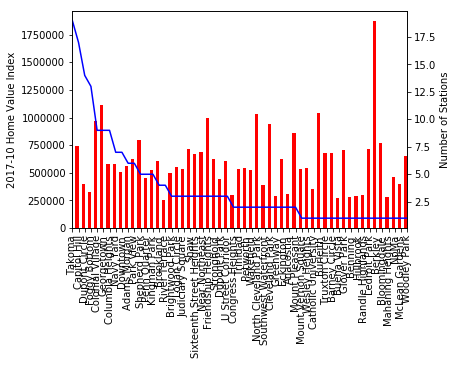

In [5]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.


sorted_df['Oct2017'].plot(kind='bar', color='red', ax=ax, position=1)
sorted_df.NumberOfStation.plot(kind='line', color='blue', ax=ax2)

ax.set_ylabel('2017-10 Home Value Index')
ax2.set_ylabel('Number of Stations')

# Use name column to label x ticks
_ = ax.set_xticklabels(sorted_df.Region.astype(str).values)
plt.savefig("2017-10 Home Value Index vs. Number of Stations.png")
plt.show()

In [65]:
plt.savefig("2017-10 Home Value Index vs. Number of Stations.png")

In [8]:
#Find correlation coefficient b/w Number of Station and home value index
sorted_df['Oct2017'].corr(sorted_df['NumberOfStation'])

0.024039202009886372

In [9]:
#Find correlation coefficient b/w Number of Station and home value index - Spearman
sorted_df['Oct2017'].corr(sorted_df['NumberOfStation'], method='spearman')

0.11125135387932453